1.下載 cv2 (opencv_python‑3.4.6‑cp37‑cp37m‑win_amd64.whl)
https://www.lfd.uci.edu/~gohlke/pythonlibs/

2. 下載完，放到conda對應的資料夾裡(d:\Anadonda3\Lib\site-packages) 
3. 安裝指令在 Anaconda Prompt
4. conda install 檔名

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
# 讀取圖檔
img = cv2.imread('C:\\Users\\Big data\\Pictures\\Saved Pictures\\unnamed.png')

In [4]:
#以 cv2.imread 讀進來的資料，會儲存成一個 NumPy 的陣列
type(img)

numpy.ndarray

In [5]:
#可以檢查一下這個 NumPy 陣列的大小
img.shape

(200, 500, 3)

In [11]:
# 顯示圖片
cv2.imshow("My Image", img_gray)
# 按下任意鍵則關閉所有視窗
cv2.waitKey (0)
cv2.destroyAllWindows()

In [12]:
# 讓視窗可以自由縮放大小
cv2.namedWindow('My Image', cv2.WINDOW_NORMAL)

cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# 寫入不同圖檔格式
cv2.imwrite('output.jpg', img)
cv2.imwrite('output.tiff', img)

True

In [15]:
# 設定 JPEG 圖片品質為 90（可用值為 0 ~ 100）
cv2.imwrite('output.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])
# 設定 PNG 壓縮層級為 5（可用值為 0 ~ 9）
cv2.imwrite('output.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 5])

True

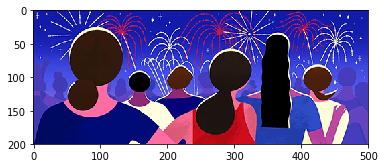

In [17]:
# 使用 OpenCV 讀取圖檔
img_bgr = cv2.imread('C:\\Users\\Big data\\Pictures\\Saved Pictures\\unnamed.png')
# 將 BGR 圖片轉為 RGB 圖片
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 使用 Matplotlib 顯示圖片
plt.imshow(img_rgb)
plt.show()

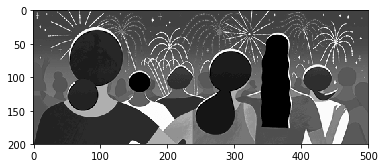

In [19]:
# 使用 OpenCV 讀取灰階圖檔
img_gray = cv2.imread('C:\\Users\\Big data\\Pictures\\Saved Pictures\\unnamed.png',cv2.IMREAD_GRAYSCALE)
# 使用 Matplotlib 顯示圖片
plt.imshow(img_gray, cmap='gray')
plt.show()


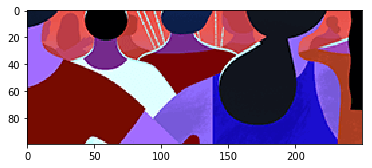

In [3]:
# 讀取圖檔
img = cv2.imread('C:\\Users\\Big data\\Pictures\\Saved Pictures\\unnamed.png')
# 裁切區域的 x 與 y 座標（左上角）
x = 100
y = 100
# 裁切區域的長度與寬度
w = 250
h = 150
# 裁切圖片
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()

In [4]:
# 寫入圖檔
cv2.imwrite('crop.jpg', crop_img)

True

圖像幾何變換
一、函數簡介
1、warpAffine—圖像放射變換(平移、旋轉、縮放)
函數原型：warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
src：原圖像矩陣；
M：變換矩陣；
dszie：圖像尺寸(大小)
其它參數默認即可。

2、flip—圖像翻轉
函數原型：flip(src, flipCode, dst=None)
sre：原圖像矩陣；
flipCode：翻轉方向：1：水平翻轉；0：垂直翻轉；-1：水平垂直翻轉
dst：默認即可

--------------------- 
作者：jnulzl 
來源：CSDN 
原文：https://blog.csdn.net/jnulzl/article/details/47057673 
版權聲明：本文為博主原創文章，轉載請附上博文連結！


In [5]:
#encoding:utf-8
import numpy as np
import cv2
image = cv2.imread('C:\\Users\\Big data\\Pictures\\Saved Pictures\\unnamed.png')
cv2.imshow("Original",image)
#平移矩陣1：向x正方向平移25，向y正方向平移50
M = np.float32([[1,0,25],[0,1,50]])
shifted = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
cv2.imshow("Shifted Down and Right",shifted)
cv2.waitKey(0)
#平移矩陣2：向x負方向平移-50，向y負方向平移-90
M = np.float32([[1,0,-50],[0,1,-90]])
shifted = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
cv2.imshow("Shifted Up and Left",shifted)
cv2.waitKey(0)

-1

In [ ]:
cv2.imshow("Original",image)
cv2.waitKey(0)
(h,w) = image.shape[:2]
center = (w / 2,h / 2)
#旋轉45度，縮放0.75
#旋轉縮放矩陣：(旋轉中心，旋轉角度，縮放因數)
M = cv2.getRotationMatrix2D(center,45,0.75)
rotated = cv2.warpAffine(image,M,(w,h))
cv2.imshow("Rotated by 45 Degrees",rotated)
cv2.waitKey(0)
#旋转-45度，缩放1.25
#旋轉縮放矩陣：(旋轉中心，旋轉角度，縮放因數)
M = cv2.getRotationMatrix2D(center,-45,1.25)
rotated = cv2.warpAffine(image,M,(w,h))
cv2.imshow("Rotated by -90 Degrees",rotated)
cv2.waitKey(0)

In [ ]:
#Python中呼叫OpenCV介面儲存攝像頭或視訊中的影象
import cv2

cap = cv2.VideoCapture(0)   # 開啟攝像頭

size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, size)


while(1):
    ret, frame = cap.read()
    if ret==True:
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()